In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding='windows-1254')
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df
df["Order_month"] = df["Order Date"].str.extract(r'(\d{1,2})')
df["Order_day"] = df["Order Date"].str.extract(r'(?<=/)(.*?)(?=/)')
df["Order_year"] = df["Order Date"].str.extract(r'(\d{4}$)')
df["Order_yearmonth"] = df["Order_month"] + "/" + df["Order_year"]
df
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Order_yearmonth"] = pd.to_datetime(df["Order_yearmonth"])

In [21]:
viz2df = pd.DataFrame(df.groupby(["Order_yearmonth", "Category"])["Profit"].apply(lambda x: x.sum() / x.count()))
viz2df

Profit
Order_yearmonth Category                  
2014-01-01      Furniture        40.273325
                Office Supplies  15.779012
                Technology       95.085956
2014-02-01      Furniture        17.241671
                Office Supplies   5.680355
...                                    ...
2017-11-01      Office Supplies  13.517239
                Technology       61.020829
2017-12-01      Furniture        10.818442
                Office Supplies   6.314282
                Technology       74.163717

[144 rows x 1 columns]

In [23]:
test = viz2df.reset_index()
test.set_index("Order_yearmonth", inplace=True)
test = test.pivot(columns="Category")["Profit"]
test.fillna(0, inplace=True)
test

Category,Furniture,Office Supplies,Technology
Order_yearmonth,,,
2014-01-01,40.273325,15.779012,95.085956
2014-02-01,17.241671,5.680355,70.690713
2014-03-01,-34.201667,12.455032,16.225982
2014-04-01,21.322312,12.050706,74.394096
2014-05-01,-14.578233,24.608513,49.680844
2014-06-01,19.877177,36.088483,64.227452
2014-07-01,11.340809,-30.268502,45.224568
2014-08-01,27.644654,27.133340,69.890096
2014-09-01,33.189243,40.358676,-5.000835


In [24]:
test.index = test.index.strftime("%m-%Y")
test

Category,Furniture,Office Supplies,Technology
Order_yearmonth,,,
01-2014,40.273325,15.779012,95.085956
02-2014,17.241671,5.680355,70.690713
03-2014,-34.201667,12.455032,16.225982
04-2014,21.322312,12.050706,74.394096
05-2014,-14.578233,24.608513,49.680844
06-2014,19.877177,36.088483,64.227452
07-2014,11.340809,-30.268502,45.224568
08-2014,27.644654,27.133340,69.890096
09-2014,33.189243,40.358676,-5.000835


In [25]:
arr = []
for month in test.index:
    if ("01-" in month) or ("07-" in month):
        arr.append(month)
arr.append("12-2017")

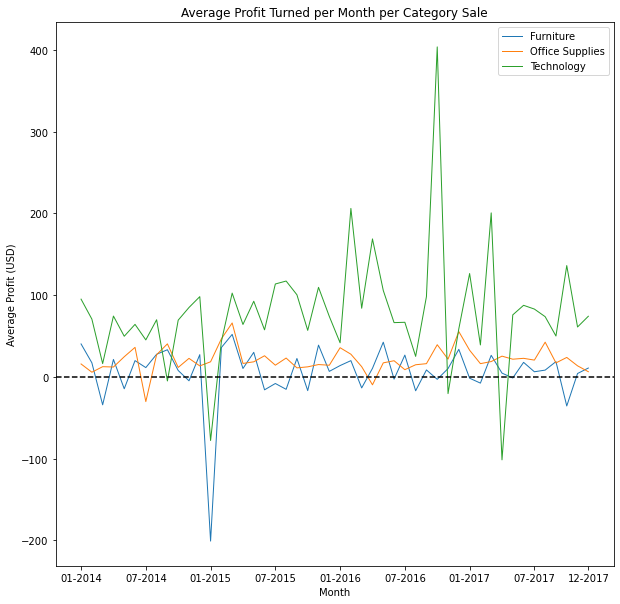

In [31]:
plt.figure(figsize=(10,10))

for column in test:
    x = plt.plot(test.index, test[column], label=column, 
         linewidth=1)
plt.legend()
plt.xticks(ticks = arr)
plt.axhline(y=0.0, color='black', linestyle='--')
plt.title("Average Profit Turned per Month per Category Sale")
plt.xlabel("Month")
plt.ylabel("Average Profit (USD)")
plt.savefig('../Figures/fig_02.png')